## Implementing A Simple Convolutional Neural Network By Keras

### Import Statements

In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Spliting DataSet

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Making copy for testing visually later

In [4]:
test_images_demo=test_images.copy()
test_labels_demo=test_labels.copy()

Reshaping and prepping data

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

showing a test image

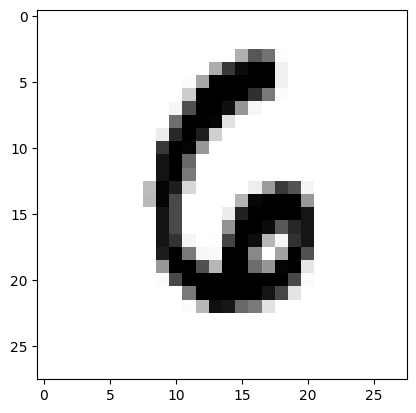

In [6]:
digit = test_images_demo[81]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Creating a model

In [7]:
network=models.Sequential()
network.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

network.compile(optimizer="rmsprop",loss='categorical_crossentropy',
metrics=['accuracy'])

### Training data

using cataogircal

In [8]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Fiiting and running the model

In [9]:
network.fit(train_images,train_labels,epochs=10,batch_size=128)

Epoch 1/10
469/469 [==============================] - 9s 16ms/step - loss: 0.2556 - accuracy: 0.9255
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1019 - accuracy: 0.9700
Epoch 3/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0687 - accuracy: 0.9797
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0496 - accuracy: 0.9853
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0381 - accuracy: 0.9885
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0284 - accuracy: 0.9917
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0221 - accuracy: 0.9935
Epoch 8/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0165 - accuracy: 0.9951
Epoch 9/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0129 - accuracy: 0.9963
Epoch 10/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0105 - accura

Testing dataset

In [10]:
score=network.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.0784 - accuracy: 0.9812


### Manual Testing

   Getting a handwritten image

In [11]:
manual_test_image = test_images_demo[81]

In [12]:
#lost which acts as labels ie 0-1-2-3-4-5-6-7-8-9
list = [0,0,0,0,0,1,0,0,0,0]

manual_test_label = np.array(list)


Reshaping image and label data

In [13]:
manual_test_image =manual_test_image.reshape((1,28*28))

manual_test_label=manual_test_label.reshape((1,10))

#### Evaluating Manual Data

In [14]:
score=network.evaluate(manual_test_image,manual_test_label)

1/1 [==============================] - 0s 312ms/step - loss: 2464.9790 - accuracy: 0.0000e+00


## Evaluting numbers based on given image

In [15]:
import cv2

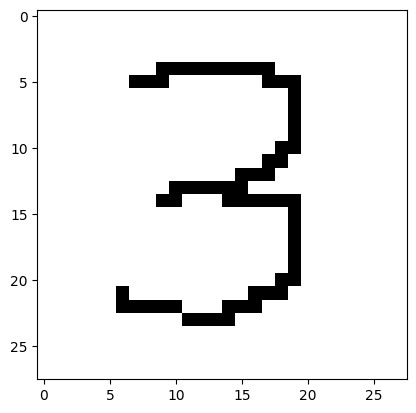

In [16]:
img = cv2.imread("hi.png")
img = cv2.resize(img, (28,28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img= cv2.bitwise_not(img) # invert image
plt.imshow(img, cmap = plt.cm.binary)

In [17]:
img=img.reshape((1,(28*28)))

In [18]:
predictions = network.predict([img])
print(np.argmax(predictions[0]))


1/1 [==============================] - 0s 199ms/step
3
